In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ads = pd.concat([pd.read_csv('Data/advertisements.csv'), pd.read_csv('Data/advertisements 2.csv')])

In [3]:
ads_indexed = []

for k, v in ads.groupby((ads['search_url'].shift() != ads['search_url']).cumsum()):
    hold = v
    hold['ID'] = k
    ads_indexed.append(hold)

In [4]:
ads = pd.concat(ads_indexed)
ads.columns = ads.columns.str.strip()
ads.to_csv('ads_w_id.csv', index=False)

In [5]:
ads.head()

,search_url,ad_url,query_type,user_type,user_agent,cookie_consent,ID
0,https://www.google.com.tr/search?q=elit+spor+a...,https://www.morhipo.com/spor-ayakkabi,E,E,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,YES,1
1,https://www.google.com.tr/search?q=elit+spor+a...,https://www.ayakkabidunyasi.com.tr/reebok-siya...,E,E,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,YES,1
2,https://www.google.com.tr/search?q=elit+spor+a...,https://www.flo.com.tr/spor-ayakkabi,E,E,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,YES,1
3,https://www.google.com.tr/search?q=elit+spor+a...,https://www.korayspor.com/,E,E,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,YES,1
4,https://www.google.com.tr/search?q=elit+spor+a...,https://www.n11.com/spor-giyim-ve-ayakkabi/spo...,E,E,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...,YES,1


### Num searches conducted

In [6]:
ads['ID'].nunique()

766

### Num ads collected

In [7]:
ads.shape[0]

2293

### Overall average number of ads

In [8]:
ads.groupby('ID').count().agg('mean')['ad_url']

2.993472584856397

## ad preference counts

In [9]:
ads.groupby(['ID', 'cookie_consent']).count().reset_index()['cookie_consent'].value_counts()

NO     498
YES    268
Name: cookie_consent, dtype: int64

### designed user type counts

In [10]:
ads.groupby(['ID', 'user_type']).count().reset_index()['user_type'].value_counts()

E    519
C    251
Name: user_type, dtype: int64

In [11]:
ad_count_per_usr = ads.groupby(['ID', 'user_type', 'cookie_consent', 'query_type'])\
                      .count()['ad_url']\
                      .reset_index()\
                      .set_index('ID')

### avrage number of ads per user

In [12]:
ads.groupby(['ID', 'user_type']).count()['ad_url'].reset_index()\
    .groupby('user_type').agg('mean')['ad_url']

user_type
C    2.780876
E    3.073218
Name: ad_url, dtype: float64

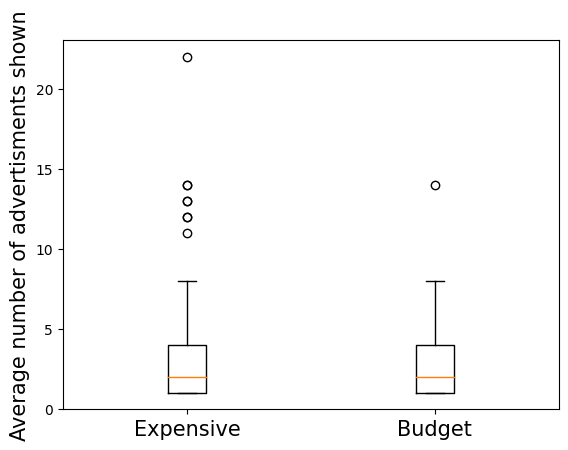

In [13]:
expensive_u = ad_count_per_usr[ad_count_per_usr['user_type'] == 'E']['ad_url']
budget_u = ad_count_per_usr[ad_count_per_usr['user_type'] == 'C']['ad_url']

fig, ax = plt.subplots()

ax.boxplot([expensive_u, budget_u])

ax.set_xticklabels(['Expensive', 'Budget'], size=15)
ax.set_ylabel('Average number of advertisments shown', size=15)

fig.savefig('graphs/1.jpeg')

###  Mann-Whitney rank test

In [14]:
stats.mannwhitneyu(expensive_u, budget_u, alternative='greater')

MannwhitneyuResult(statistic=70445.5, pvalue=0.03713850874063866)

With 95% significance, we reject the null hypothesis that the both groups receive the same amount of ads, with the alternative expensive > budget

## Cookie Consent

In [15]:
ads.groupby(['ID', 'cookie_consent']).count()['ad_url'].reset_index()\
    .groupby('cookie_consent').agg('mean')['ad_url']

cookie_consent
NO     2.959839
YES    3.055970
Name: ad_url, dtype: float64

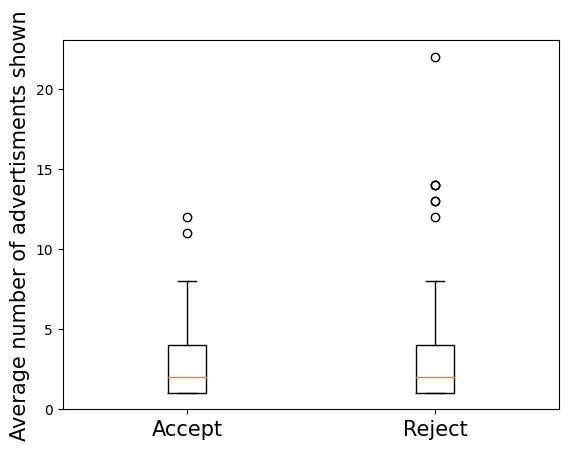

In [16]:
accept = ad_count_per_usr[ad_count_per_usr['cookie_consent'] == 'YES']['ad_url']
reject = ad_count_per_usr[ad_count_per_usr['cookie_consent'] == 'NO']['ad_url']

fig, ax = plt.subplots()

ax.boxplot([accept, reject])

ax.set_xticklabels(['Accept', 'Reject'], size=15)
ax.set_ylabel('Average number of advertisments shown', size=15)

fig.savefig('graphs/2.jpeg')

In [17]:
stats.mannwhitneyu(accept, reject, alternative='greater')

MannwhitneyuResult(statistic=71369.0, pvalue=0.08369636977477068)

With 95% significance, we fail to reject the null hypothesis that the both groups receive the same amount of ads, with the alternative consent given > consent not given

In [18]:
ads['user_type'].unique()

array(['E', 'C'], dtype=object)

## Query type

In [19]:
ads.groupby(['ID', 'query_type']).count()['ad_url'].reset_index()\
    .groupby('query_type').agg('mean')['ad_url']

query_type
C    3.528428
E    2.431818
N    2.834677
Name: ad_url, dtype: float64

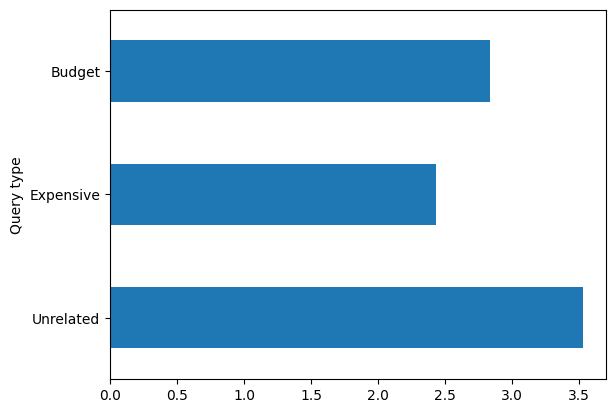

In [20]:
ax = ads.groupby(['ID', 'query_type']).count()['ad_url'].reset_index()\
    .groupby('query_type').agg('mean')['ad_url']\
    .plot.barh(ylabel='Query type')

ax.set_yticklabels(['Unrelated', 'Expensive', 'Budget'])
ax.set_ylabel('Query type')

ax.figure.savefig('graphs/3.jpeg')

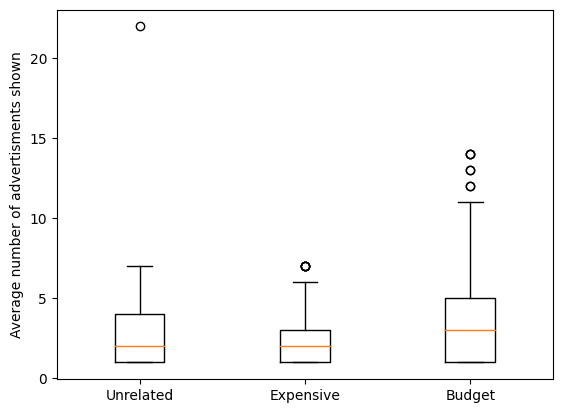

In [21]:
unrelated = ad_count_per_usr[ad_count_per_usr['query_type'] == 'N']['ad_url']
budget = ad_count_per_usr[ad_count_per_usr['query_type'] == 'C']['ad_url']
expensive = ad_count_per_usr[ad_count_per_usr['query_type'] == 'E']['ad_url']

fig, ax = plt.subplots()

ax.boxplot([unrelated, expensive, budget])

ax.set_xticklabels(['Unrelated', 'Expensive', 'Budget'])
ax.set_ylabel('Average number of advertisments shown')

fig.savefig('graphs/4.jpeg')

In [22]:
stats.kruskal(unrelated, budget, expensive)

KruskalResult(statistic=22.890531291874254, pvalue=1.0700012524991699e-05)

In [23]:
ad_count_per_usr#.corr()

,user_type,cookie_consent,query_type,ad_url
ID,,,,
1,E,YES,E,5
2,E,YES,N,6
3,E,YES,N,2
4,E,YES,N,1
5,E,YES,E,3
...,...,...,...,...
762,C,NO,C,3
763,E,NO,E,1
764,E,NO,E,2
